# Shadow detection

As a preprocessing step:
* Detect shadows in the foreground person.
* Detect shadows in the background.
* Remove/lighten shadows from the foreground person.

### 1. Detect shadows in the foreground person.

In [1]:
# imports
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# directories
ROOT = os.path.dirname(os.getcwd())
RAW_DIR = os.path.join(ROOT, 'data', 'raw')
PROCESSED_DIR = os.path.join(ROOT, 'data', 'processed')

#### 1.1 Trival HSV Shadow Detection

We detect shadows in the foreground person by thresholding the HSV image, on the V channel. An obvious drawback of this method is that it'll detect dark regions as shadows, even if they are not shadows. e.g. the person's hair.

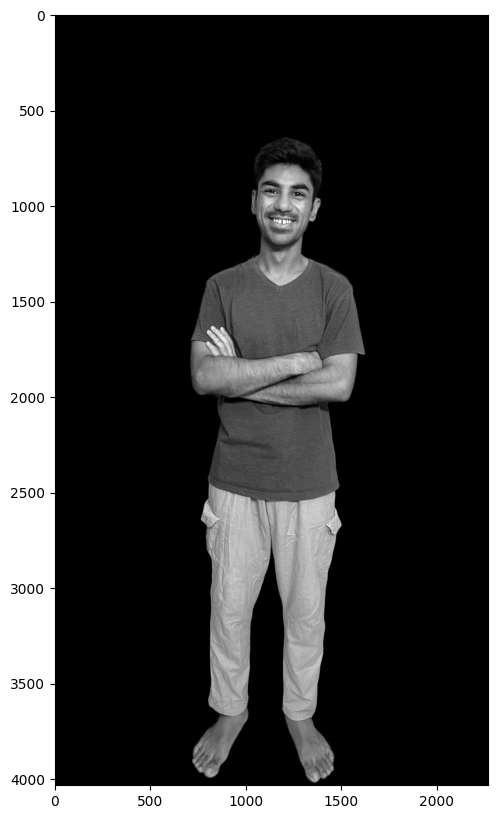

In [38]:
fg = cv2.imread(PROCESSED_DIR + '/person1_subject.png')
fg_hsv = cv2.cvtColor(fg, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(10, 10))
plt.imshow(fg_hsv[:,:,2], cmap='gray')
plt.show()

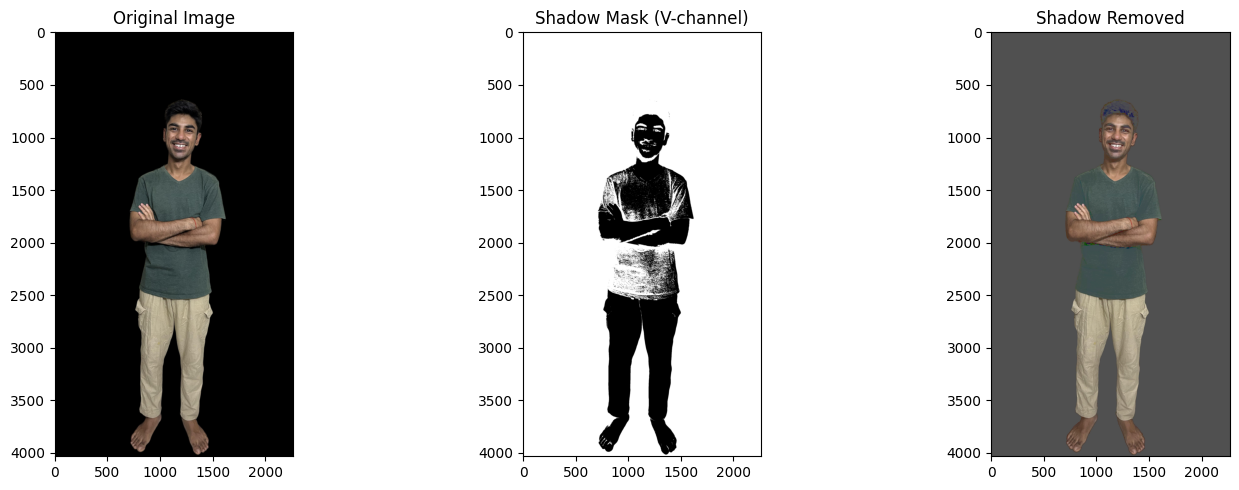

In [59]:
shadow_mask = fg_hsv[:,:,2] < 80

illum = fg_hsv.copy()
illum[:,:,2] = 80

shadow_mask = np.dstack((shadow_mask, shadow_mask, shadow_mask))

fin = (1-shadow_mask)*fg_hsv + shadow_mask*illum

fin = cv2.cvtColor(fin.astype(np.uint8), cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 5))

# Original image
plt.subplot(131)
plt.imshow(cv2.cvtColor(fg, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# V-channel mask
plt.subplot(132)
plt.imshow(shadow_mask[:,:,0], cmap='gray')
plt.title('Shadow Mask (V-channel)')

# Shadow removed image
plt.subplot(133)
plt.imshow(fin)
plt.title('Shadow Removed')

plt.tight_layout()
plt.show()

#### 1.2 Deep Learning Based Shadow Detection

We use a pre-trained model to detect shadows in the foreground person.